In [2]:
pip install pandas nltk matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


=== Emotion Analysis Results ===

Text: I absolutely love this new product! It's amazing and has changed my life! #happy
Emotion: Very Positive
Sentiment Scores: Negative=0.00, Neutral=0.46, Positive=0.55, Compound=0.92
--------------------------------------------------

Text: This service is terrible. I've been waiting for hours and no response. @company #angry
Emotion: Very Negative
Sentiment Scores: Negative=0.46, Neutral=0.54, Positive=0.00, Compound=-0.82
--------------------------------------------------

Text: Just had an okay experience at the restaurant. Food was good but service was slow.
Emotion: Positive
Sentiment Scores: Negative=0.00, Neutral=0.79, Positive=0.21, Compound=0.34
--------------------------------------------------

Text: I can't believe how wonderful today has been! Everything is perfect!
Emotion: Positive
Sentiment Scores: Negative=0.20, Neutral=0.54, Positive=0.25, Compound=0.18
--------------------------------------------------

Text: Feeling a bit down to

C:\Users\allen\AppData\Local\Temp\ipykernel_12648\3287571083.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=df, palette='viridis')


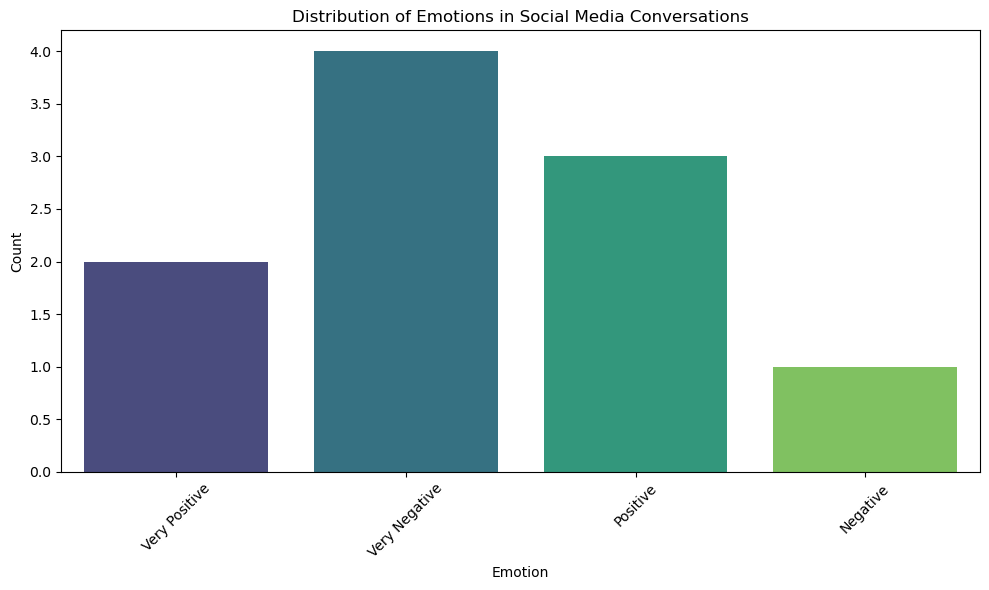

C:\Users\allen\AppData\Local\Temp\ipykernel_12648\3287571083.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiments.index, y=avg_sentiments.values, palette='coolwarm')


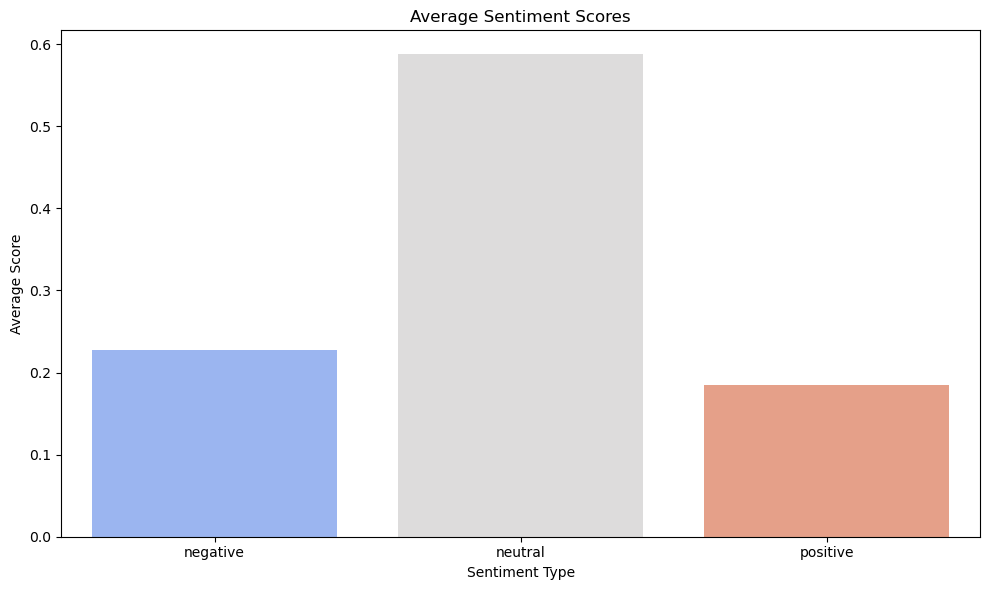


=== Summary Statistics ===
Emotion Distribution:
emotion
Very Negative    4
Positive         3
Very Positive    2
Negative         1
Name: count, dtype: int64

Average Sentiment (Compound Score): -0.08
Overall Mood: Neutral


In [4]:
import pandas as pd
import re
import nltk
from typing import List, Dict, Tuple, Union, Optional
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)


class SocialMediaEmotionAnalyzer:
    """
    A class for analyzing emotions in social media conversations through sentiment analysis.
    """
    
    def __init__(self) -> None:
        """
        Initialize the emotion analyzer with the VADER sentiment analyzer.
        """
        self.sentiment_analyzer = SentimentIntensityAnalyzer()
        self.stop_words = set(stopwords.words('english'))
        
    def preprocess_text(self, text: str) -> str:
        """
        Clean and preprocess the text data.
        
        Args:
            text: Raw text string to be preprocessed
            
        Returns:
            Cleaned and preprocessed text
        """
        text = text.lower()
        
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
        
        text = re.sub(r'@\w+', '', text)
        
        text = re.sub(r'#(\w+)', r'\1', text)
        
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    
    def analyze_sentiment(self, text: str) -> Dict[str, float]:
        """
        Analyze the sentiment of a given text.
        
        Args:
            text: Text to analyze
            
        Returns:
            Dictionary containing sentiment scores (neg, neu, pos, compound)
        """
        return self.sentiment_analyzer.polarity_scores(text)
    
    def classify_emotion(self, sentiment_score: float) -> str:
        """
        Classify the emotion based on sentiment score.
        
        Args:
            sentiment_score: Compound sentiment score
            
        Returns:
            Classified emotion as a string
        """
        if sentiment_score >= 0.5:
            return "Very Positive"
        elif 0.1 <= sentiment_score < 0.5:
            return "Positive"
        elif -0.1 < sentiment_score < 0.1:
            return "Neutral"
        elif -0.5 < sentiment_score <= -0.1:
            return "Negative"
        else:
            return "Very Negative"
    
    def analyze_conversations(self, conversations: List[str]) -> pd.DataFrame:
        """
        Analyze a list of conversations and return a DataFrame with results.
        
        Args:
            conversations: List of conversation texts
            
        Returns:
            DataFrame containing original text, preprocessed text, sentiment scores, and emotions
        """
        results = []
        
        for text in conversations:
            preprocessed_text = self.preprocess_text(text)
            sentiment = self.analyze_sentiment(preprocessed_text)
            emotion = self.classify_emotion(sentiment['compound'])
            
            results.append({
                'original_text': text,
                'preprocessed_text': preprocessed_text,
                'negative': sentiment['neg'],
                'neutral': sentiment['neu'],
                'positive': sentiment['pos'],
                'compound': sentiment['compound'],
                'emotion': emotion
            })
        
        return pd.DataFrame(results)
    
    def visualize_emotions(self, df: pd.DataFrame) -> None:
        """
        Visualize the distribution of emotions in the analyzed conversations.
        
        Args:
            df: DataFrame containing analysis results
        """
        plt.figure(figsize=(10, 6))
        sns.countplot(x='emotion', data=df, palette='viridis')
        plt.title('Distribution of Emotions in Social Media Conversations')
        plt.xlabel('Emotion')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Visualize average sentiment scores
        plt.figure(figsize=(10, 6))
        avg_sentiments = df[['negative', 'neutral', 'positive']].mean()
        sns.barplot(x=avg_sentiments.index, y=avg_sentiments.values, palette='coolwarm')
        plt.title('Average Sentiment Scores')
        plt.xlabel('Sentiment Type')
        plt.ylabel('Average Score')
        plt.tight_layout()
        plt.show()


def main() -> None:
    """
    Main function to demonstrate the social media emotion analyzer.
    """
    sample_conversations = [
        "I absolutely love this new product! It's amazing and has changed my life! #happy",
        "This service is terrible. I've been waiting for hours and no response. @company #angry",
        "Just had an okay experience at the restaurant. Food was good but service was slow.",
        "I can't believe how wonderful today has been! Everything is perfect!",
        "Feeling a bit down today. Nothing seems to be going right. #sad",
        "This movie was neither good nor bad. It was just there.",
        "I hate when people don't respond to important messages! So frustrating!",
        "Just graduated! So proud of myself and excited for the future! #graduation #happy",
        "The weather is nice today, might go for a walk later.",
        "This is the worst day ever. Everything that could go wrong did go wrong."
    ]
    
    analyzer = SocialMediaEmotionAnalyzer()
    
    results_df = analyzer.analyze_conversations(sample_conversations)
    
    print("=== Emotion Analysis Results ===")
    for i, row in results_df.iterrows():
        print(f"\nText: {row['original_text']}")
        print(f"Emotion: {row['emotion']}")
        print(f"Sentiment Scores: Negative={row['negative']:.2f}, Neutral={row['neutral']:.2f}, "
              f"Positive={row['positive']:.2f}, Compound={row['compound']:.2f}")
        print("-" * 50)
    
    analyzer.visualize_emotions(results_df)
    
    print("\n=== Summary Statistics ===")
    emotion_counts = results_df['emotion'].value_counts()
    print(f"Emotion Distribution:\n{emotion_counts}")
    
    avg_compound = results_df['compound'].mean()
    print(f"\nAverage Sentiment (Compound Score): {avg_compound:.2f}")
    print(f"Overall Mood: {analyzer.classify_emotion(avg_compound)}")


if __name__ == "__main__":
    main()

In [2]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import io
from PIL import Image
import numpy as np

class SocialMediaEmotionAnalyzer:
    pass

def analyze_text(text: str) -> tuple:
    """
    Analyze a single text input and return results with visualization.
    
    Args:
        text: The text to analyze
        
    Returns:
        tuple: (results_html, emotion_image)
    """
    analyzer = SocialMediaEmotionAnalyzer()
    
    conversations = [text]
    results_df = analyzer.analyze_conversations(conversations)
    
    row = results_df.iloc[0]
    results_html = f"""
    <h3>Emotion Analysis Results</h3>
    <p><b>Emotion:</b> {row['emotion']}</p>
    <p><b>Sentiment Scores:</b></p>
    <ul>
        <li>Negative: {row['negative']:.2f}</li>
        <li>Neutral: {row['neutral']:.2f}</li>
        <li>Positive: {row['positive']:.2f}</li>
        <li>Compound: {row['compound']:.2f}</li>
    </ul>
    """
    emotion_image = create_emotion_visualization(results_df, analyzer)
    
    return results_html, emotion_image

def create_emotion_visualization(results_df: pd.DataFrame, analyzer: SocialMediaEmotionAnalyzer) -> np.ndarray:
    """
    Create a visualization of emotions and return as an image.
    
    Args:
        results_df: DataFrame with analysis results
        analyzer: The analyzer instance
        
    Returns:
        np.ndarray: The visualization as an image
    """
    plt.figure(figsize=(10, 6))
    
    buf = io.BytesIO()
    
    analyzer.visualize_emotions(results_df)
    
    plt.savefig(buf, format='png')
    buf.seek(0)
    
    img = Image.open(buf)
    img_array = np.array(img)
    
    plt.close()
    
    return img_array

def analyze_batch(text_input: str) -> tuple:
    """
    Analyze a batch of texts (one per line) and return results with visualization.
    
    Args:
        text_input: Multiple texts, one per line
        
    Returns:
        tuple: (results_html, emotion_image, summary_html)
    """
    conversations = [line.strip() for line in text_input.split('\n') if line.strip()]
    
    analyzer = SocialMediaEmotionAnalyzer()
    
    results_df = analyzer.analyze_conversations(conversations)
    
    results_html = "<h3>Individual Analysis Results</h3>"
    for i, row in results_df.iterrows():
        results_html += f"""
        <div style="margin-bottom: 15px; padding: 10px; border: 1px solid #ddd; border-radius: 5px;">
            <p><b>Text:</b> {row['original_text']}</p>
            <p><b>Emotion:</b> {row['emotion']}</p>
            <p><b>Sentiment:</b> Negative={row['negative']:.2f}, Neutral={row['neutral']:.2f}, 
               Positive={row['positive']:.2f}, Compound={row['compound']:.2f}</p>
        </div>
        """
    
    # Create visualization
    emotion_image = create_emotion_visualization(results_df, analyzer)
    
    # Create summary statistics HTML
    emotion_counts = results_df['emotion'].value_counts()
    avg_compound = results_df['compound'].mean()
    
    summary_html = f"""
    <h3>Summary Statistics</h3>
    <p><b>Emotion Distribution:</b></p>
    <ul>
    """
    
    for emotion, count in emotion_counts.items():
        summary_html += f"<li>{emotion}: {count}</li>"
    
    summary_html += f"""
    </ul>
    <p><b>Average Sentiment (Compound Score):</b> {avg_compound:.2f}</p>
    <p><b>Overall Mood:</b> {analyzer.classify_emotion(avg_compound)}</p>
    """
    
    return results_html, emotion_image, summary_html

# Create the Gradio interface
with gr.Blocks(title="Social Media Emotion Analyzer") as demo:
    gr.Markdown("# Social Media Emotion Analyzer")
    gr.Markdown("Analyze emotions and sentiment in social media posts and conversations.")
    
    with gr.Tab("Single Text Analysis"):
        with gr.Row():
            with gr.Column():
                text_input = gr.Textbox(
                    label="Enter text to analyze",
                    placeholder="Type your text here...",
                    lines=5
                )
                analyze_btn = gr.Button("Analyze")
            
            with gr.Column():
                results_html = gr.HTML(label="Analysis Results")
                emotion_viz = gr.Image(label="Emotion Visualization")
        
        analyze_btn.click(
            fn=analyze_text,
            inputs=text_input,
            outputs=[results_html, emotion_viz]
        )
    
    with gr.Tab("Batch Analysis"):
        with gr.Row():
            with gr.Column():
                batch_input = gr.Textbox(
                    label="Enter multiple texts (one per line)",
                    placeholder="Text 1\nText 2\nText 3...",
                    lines=10
                )
                batch_btn = gr.Button("Analyze Batch")
            
            with gr.Column():
                batch_results = gr.HTML(label="Individual Results")
                batch_viz = gr.Image(label="Emotion Visualization")
                summary_stats = gr.HTML(label="Summary Statistics")
        
        batch_btn.click(
            fn=analyze_batch,
            inputs=batch_input,
            outputs=[batch_results, batch_viz, summary_stats]
        )
    
    gr.Markdown("## Sample Texts")
    gr.Markdown("""
    Here are some sample texts you can try:
    - "I absolutely love this new product! It's amazing and has changed my life! #happy"
    - "This service is terrible. I've been waiting for hours and no response. @company #angry"
    - "Just had an okay experience at the restaurant. Food was good but service was slow."
    - "I can't believe how wonderful today has been! Everything is perfect!"
    - "Feeling a bit down today. Nothing seems to be going right. #sad"
    """)

# Launch the app
if __name__ == "__main__":
    demo.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
